# Exercise Sheet 2

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
%matplotlib inline

## 2.3 Euler moving forward

### a)

In [65]:
def forward_euler(x_0, F, dt, t_sim):
    n = int(t_sim / dt)
    dim = 1
    if len(np.shape(x_0)) > 0:
        dim = np.shape(x_0)[0]
    x = np.zeros((n+1,dim))
    x[0] = x_0
    t = np.zeros(n+1)
    t[0] = 0
    for i in range(n):
        dx = dt * F(x[i],t[i])
        x[i+1] = x[i] + dx
        t[i+1] = t[i] + dt
    return x, t
    
def plot_forward_euler(dt_list,*args,**kwargs):
    for (i, dt) in enumerate(dt_list):
        x, t = forward_euler(dt=dt,*args,**kwargs)
        fig = plt.figure()
        if len(np.shape(x))>1:
            x_plt = x[:,0]
        else:
            x_plt = x
        plt.plot(t,x_plt)

In [66]:
I_step = lambda t,I_0,t_0: I_0 if t >= t_0 else 0

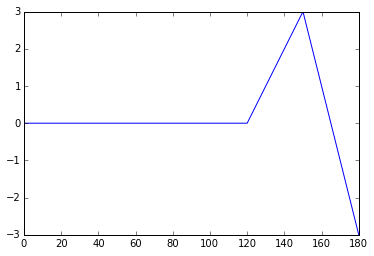

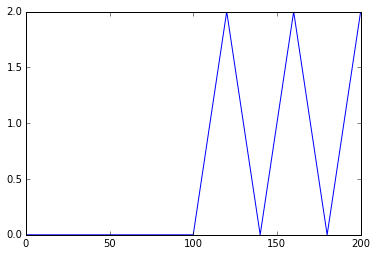

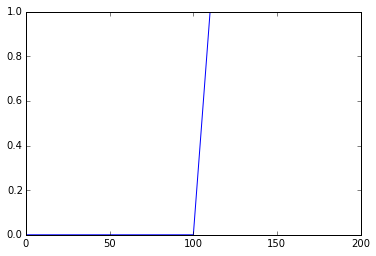

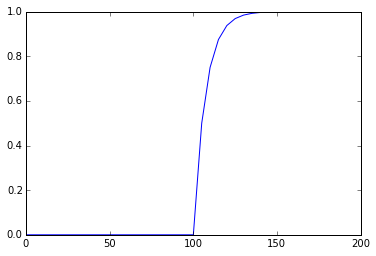

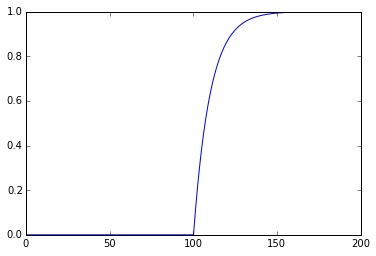

In [67]:
tau = 10
t_0 = 100
u_0 = 0
t_sim = 200
dt_list = np.array([30,20,10,5,0.1])
F_stable = lambda u,t: (-u + I_step(t,I_0=1,t_0=t_0))/tau
plot_forward_euler(x_0=0, F=F_stable, dt_list=dt_list, t_sim=t_sim)

### b)

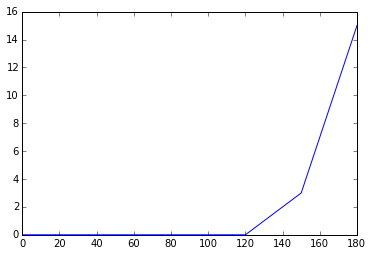

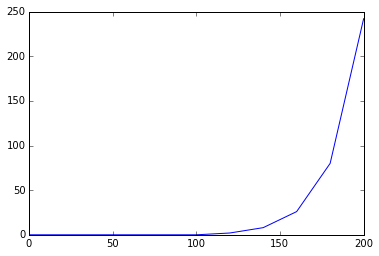

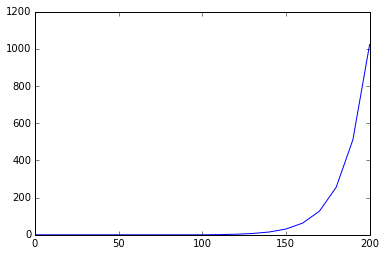

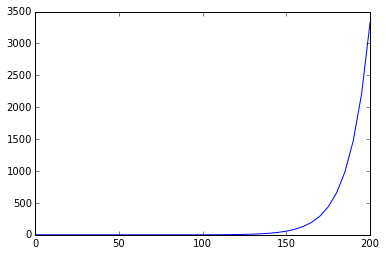

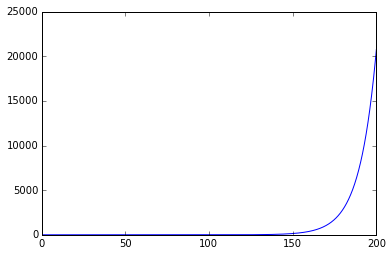

In [68]:
F_unstable = lambda u,t: (u + I_step(t,I_0=1,t_0=t_0))/tau
plot_forward_euler(x_0=0, F=F_unstable, dt_list=dt_list, t_sim=t_sim)

### c)

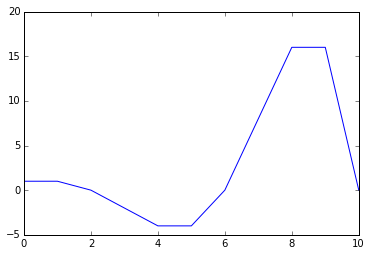

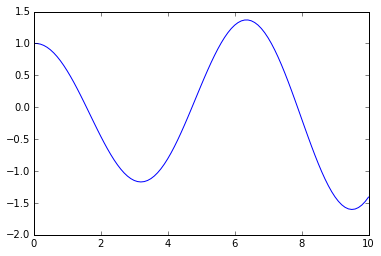

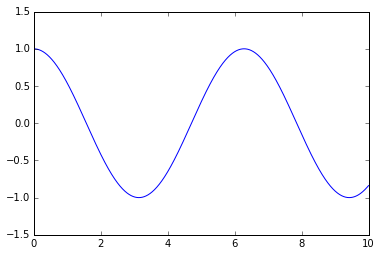

In [69]:
F_osc2d = lambda x,t: np.dot(np.array([[0,1],[-1,0]]),x)
plot_forward_euler(x_0=np.array([1,0]), F=F_osc2d, dt_list=[1,0.1,1e-5], t_sim=10)

### d)

In [77]:
from numpy import exp
E = {
    'Na': 115.,
    'K': -12.,
    'l': 10.6,
}
g = {
    'Na': 120.,
    'K': 36.,
    'l': 0.3,
}
alpha = {
    'n': lambda u: (0.1 - 0.01*u)/(exp(1. - 0.1*u) - 1.),
    'm': lambda u: (2.5 - 0.1*u)/(exp(2.5 - 0.1*u) - 1.),
    'h': lambda u: 0.07 * exp(-u/20.),
}
beta = {
    'n': lambda u: 0.125 * exp(-u/80.),
    'm': lambda u: 4. * exp(-u/18.),
    'h': lambda u: 1./(exp(3. - 0.1*u) + 1.),
}
C = 1.

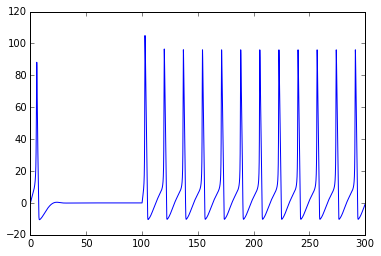

In [90]:
I = lambda t: I_step(t,I_0=7,t_0=100)
udot = lambda u,n,m,h,t: 1./C * (g['l'] * (E['l'] - u) + g['Na'] * m**3 * h * (E['Na'] - u) + g['K'] * n**4 * (E['K'] - u) + I(t))
ndot = lambda u,n,m,h,t: alpha['n'](u) - (alpha['n'](u) + beta['n'](u)) * n
mdot = lambda u,n,m,h,t: alpha['m'](u) - (alpha['m'](u) + beta['m'](u)) * m
hdot = lambda u,n,m,h,t: alpha['h'](u) - (alpha['h'](u) + beta['h'](u)) * h
F_HH = lambda x,t: np.array([ udot(*x,t=t), ndot(*x,t=t), mdot(*x,t=t), hdot(*x,t=t) ])
plot_forward_euler(x_0=np.array([0,0,0,0]),F=F_HH,dt_list=[0.01],t_sim=300)